In [45]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# Assignment 2: Due Tuesday 9/17

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2_x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = v_{x_o} \quad \quad OR \quad \quad v_x' = \ddot{x} = 0$ 

* $x' = v_{x_o}t + x_o \quad \quad OR \quad \quad x' = v_x = v_{x_o}$

* $v_y' = gt + v_{y_o} \quad \quad OR \quad \quad v_y' = \ddot{y} = g$

* $y' = g\frac{t^2}{2} + v_{y_o}t + y_o \quad \quad OR \quad \quad y' = v_y' = gt + v_{y_o}$

or wait, is  v' a distinction from v variable and v constant, or $v' = \dot{v}$?

## $$state = [x,y,v_x,v_y,]$$

Code the equations into a function 

In [46]:
def proj_vac(t,state):
    g = -9.8 #m/s
    xo = state[0]
    yo = state[1]
    vxo = state[2]
    vyo = state[3]
    

    dxdt = vxo
    x = vxo*t + xo
    dydt = g*t + vyo
    y = g*(t**2)/2 + vyo*t + yo

    y_ddot = g
    x_ddot = 0
    return np.array([dxdt,dydt,x_ddot,y_ddot])


Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [47]:


t = np.linspace(0,50,100)
t0 = t[0]
tf = t[-1]
v0 = 300
vx0 = np.cos(-50)*v0
vy0 = np.sin(-50)*v0

initial_state = np.array([0,0,vx0,vy0])


sol = integrate.solve_ivp(proj_vac, (t0,tf), initial_state, method='RK45', t_eval=t)
x = sol.y[0]
y = sol.y[1]
t_sat = sol.t



Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

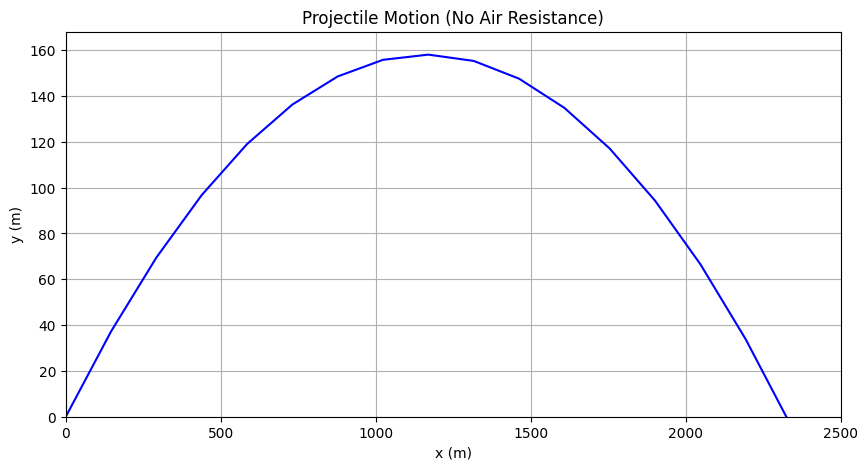

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='b')
plt.title('Projectile Motion (No Air Resistance)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, max(y) + 10)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)


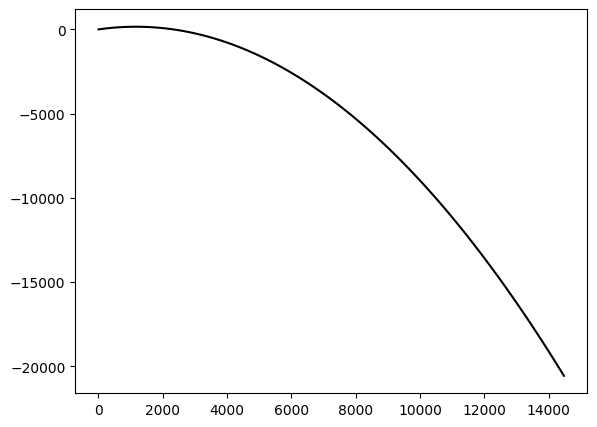

In [49]:
#aftertrouble shooting, i actually do not know why setting the limits created the expected arch compared to just plotting it basic like below
fig = plt.figure('x vs y')
axes = fig.add_axes([0.2,0.2,0.8,0.8])
axes.plot(x,y,'k',label=r'$Scipy (RK45)$');

# Part b)  $\textcolor{red}{****NOT DONE*****}$

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [50]:
def rungekutta_1(f,t,x0,args=()):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range (0,n-1):
        x[i+1] = x[i] + (t[i+1] - t[i])*f(t[i],x[i],*args)
    return x

#We will have to pass this function a list of args, here it would be b,c
# *args refres to the address of where we defined args, so it picks up all listed 
# quantities in args

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):


* $v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)\frac{v_x}{m}$

* $v_{y}' = - g - \left(c\sqrt{v^2_x + v^2_y}) \right)\frac{v_y}{m}$

* $x' = v_x$

* $y' = v_y$

Code the equations into a function

In [52]:
def proj_constant_ar(t,state):
    g = -9.8 #m/s

    gamma = 0.25 #N *s^2 / m^4
    D = 15 #cm
    #D = 0.15 #m
    p = 7.8 #g/cm^3

    volume = 4/3 * np.pi * (D/2)**3 
    c = gamma * D**2
    m = p * volume
    xo = state[0]
    yo = state[1]
    vxo = state[2]
    vyo = state[3]
    

    dxdt = vxo
    dydt = vyo

    y_ddot = g -(c*np.sqrt((dxdt**2) + (dydt**2)) * dydt / m)
    x_ddot = -(c*np.sqrt((dxdt**2) + (dydt**2)) * dxdt / m)
    return np.array([dxdt,dydt,x_ddot,y_ddot])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [54]:
tca = np.linspace(0,35,100)
tca0 = tca[0]
tcaf = tca[-1]
v0 = 300
vx0 = np.cos(-50)*v0
vy0 = np.sin(-50)*v0

initial_state = np.array([0,0,vx0,vy0])


solca = integrate.solve_ivp(proj_constant_ar, (tca0,tcaf), initial_state, method='RK45', t_eval=tca)
xca = solca.y[0]
yca = solca.y[1]
t_satca = solca.t

Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

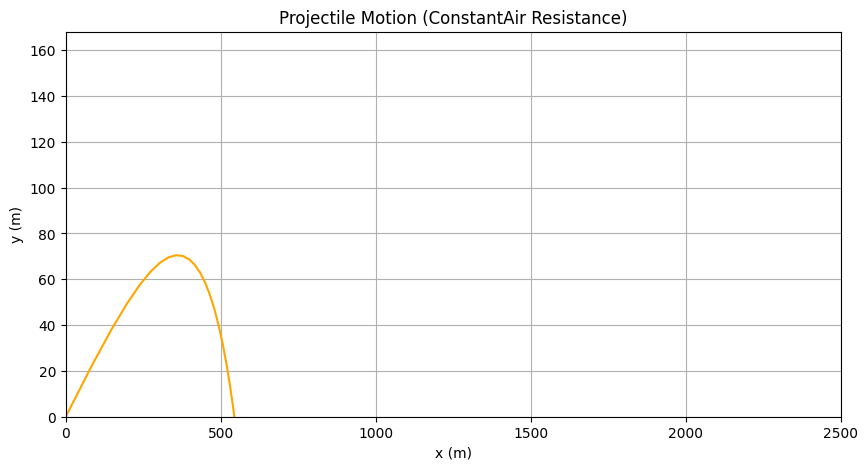

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(xca, yca, color='orange')
plt.title('Projectile Motion (ConstantAir Resistance)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, max(y) + 10)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$): 
$
\gamma D^2e^{-\frac{y}{\lambda}}
$

* $v_{x}' = -\left(\gamma D^2e^{-\frac{y}{\lambda}}\sqrt{v^2_x +v^2_y}\right)\frac{v_x}{m}$

* $v_{y}' = - g - \left(\gamma D^2e^{-\frac{y}{\lambda}}\sqrt{v^2_x + v^2_y}) \right)\frac{v_y}{m}$

* $x' = v_x$

* $y' = v_y$

* $y = v_y t + y_o$?

Code the equations into a function

In [65]:
def proj_var_ar(t,state):
    g = -9.8 #m/s

    gamma = 0.25 #N *s^2 / m^4
    D = 15 #cm
    #D = 0.15 #m
    p = 7.8 #g/cm^3

    lam = 1000 #m

    volume = 4/3 * np.pi * (D/2)**3 
  
    m = p * volume
    xo = state[0]
    yo = state[1]
    vxo = state[2]
    vyo = state[3]

    dxdt = vxo
    dydt = vyo
    y = dxdt * t

    c = gamma * D**2 * np.exp(-y/lam)

    y_ddot = g -(c*np.sqrt((dxdt**2) + (dydt**2)) * dydt / m)
    x_ddot = -(c*np.sqrt((dxdt**2) + (dydt**2)) * dxdt / m)
    return np.array([dxdt,dydt,x_ddot,y_ddot])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [66]:
tva = np.linspace(0,35,100)
t0va = tva[0]
tfva = tva[-1]
v0 = 300
vx0 = np.cos(-50)*v0
vy0 = np.sin(-50)*v0

initial_state = np.array([0,0,vx0,vy0])


solva = integrate.solve_ivp(proj_var_ar, (t0va,tfva), initial_state, method='RK45', t_eval=tva)
xva = solva.y[0]
yva = solva.y[1]
t_sava = solva.t

Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

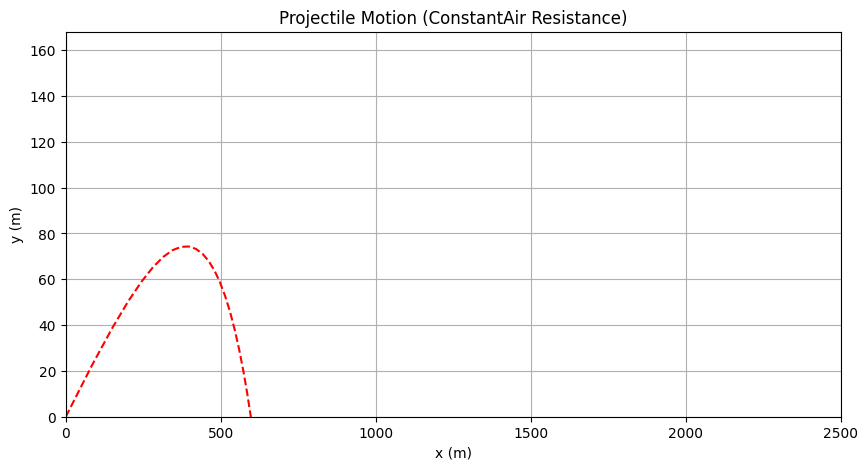

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(xva, yva,'--r')
plt.title('Projectile Motion (ConstantAir Resistance)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, max(y) + 10)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

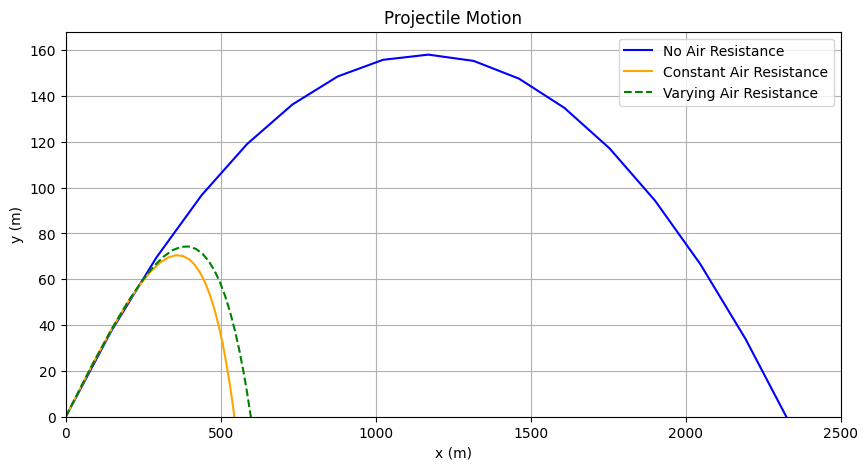

In [68]:

plt.figure(figsize=(10, 5))
plt.plot(x, y, color='b',label = "No Air Resistance")
plt.plot(xca, yca, color='orange', label = 'Constant Air Resistance')

plt.plot(xva, yva,'--g', label = 'Varying Air Resistance')

plt.title('Projectile Motion')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, max(y) + 10)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()


### my constant and varying are equal and I am not sure why, it must be something in the formulas
its because it was set to yo which is 0, ultimatly disregarding the new exp functioned that was added.
 now after I changed it to y, and defined y, since all t is so much smaller than lambda, its still practically zero, with a minor noticable change

 making lamda 1000, instead of 10,000, a clear difference can be seen
 

Your results should look like the plot below.

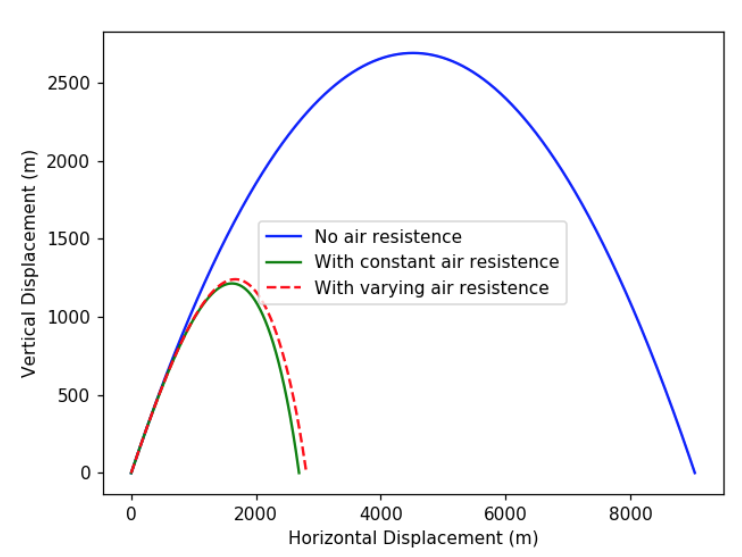

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

well from your graph, constant resistance impeads it the most